In [1]:
from __future__ import division
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1>Numpy Intro</h1>
<h3>Matrix Notation for Machine Learning</h3>
Let X be an $N \times M$ matrix.  Each row represents a datum (N total data points) and each datum has M covariates.
The response variable y is often kept in a separate matrix Y with shape $N \times 1$ (this shape depends on the problem though).  In python it is best to use numpy (num - pie) for efficient linear algebra operations

In [15]:
X = np.array([[1, 2, 3],[2, 3, 2],[1, 1, 1],[2, 4, 5]])
Y = np.array([[1, 0, 0, 1]]).T
X

array([[1, 2, 3],
       [2, 3, 2],
       [1, 1, 1],
       [2, 4, 5]])

We can get the shape of any n-dimensional numpy array with the .shape property

In [17]:
X.shape

(4, 3)

Doing linear algebra often makes use of the numpy function np.dot(a, b), which computes the dot product of a and b.  matrix addition and subtraction is done using the standard + and - symbols, and element-wise multiplication uses *.  transpose of a matrix A is A.T.

In [27]:
A = np.array([[2, 3],[3, 2],[1, 9]])
B = np.array([[2, -2],[10, -1]])
C = np.array([[-1, -1],[-1, -1]])
print A, A.shape
print "\n"
print B, B.shape

[[2 3]
 [3 2]
 [1 9]] (3, 2)


[[ 2 -2]
 [10 -1]] (2, 2)


In [26]:
np.dot(A, B) # dot product

array([[ 34,  -7],
       [ 26,  -8],
       [ 92, -11]])

In [28]:
B + C # matrix addition

array([[ 1, -3],
       [ 9, -2]])

In [29]:
B * C # matrix multiplication

array([[ -2,   2],
       [-10,   1]])

In [30]:
B - C # matrix subtraction

array([[ 3, -1],
       [11,  0]])

In general, we can efficiently compute any element-wise transformation of a matrix A using numpy functions.
For instance, suppose we wanted every element of our matrix A raised to the e.

In [32]:
np.exp(A)

array([[  7.38905610e+00,   2.00855369e+01],
       [  2.00855369e+01,   7.38905610e+00],
       [  2.71828183e+00,   8.10308393e+03]])

<h3>Numpy Broadcasting</h3>
numpy broadcasting is a way of expanding matricies during certain operations so they have compatable shapes.  For instance, we want to add two matricies together.  The first has shape $4 \times 4$ and the second has shape $4 \times 1$.  Though they have different dimensions, we can add them together by expanding the second matrix to have the same shape, by duplicating its column four times.  Numpy performs these broadcasting operations automatically (provided some conditions are met)

In [35]:
B

array([[ 2, -2],
       [10, -1]])

In [41]:
C = np.array([1, -1])
C, C.shape

(array([ 1, -1]), (2,))

Here matrix B has shape $2 \times 2$ and matrix C has shape $2$. Since matrix C is a row, numpy will broadcast by adding it to each row of B. 

In [40]:
B + C

array([[ 3, -3],
       [11, -2]])

In [44]:
C.shape = (2, 1)
C

array([[ 1],
       [-1]])

If we turn C into a column vector, numpy will broadcast by adding it two the columns of B

In [46]:
B + C

array([[ 3, -1],
       [ 9, -2]])

<h1>Theano Basics</h1>

<h3>Theano Algebra</h3>
First, lets create a simple algebraic expression in theano.  We can create symbolic theano scalars with the scalar subclass of tensor.  The argument provided is what it is called internally - its a good practice to have it the same as the variable it is stored in.  dscalar denotes double valued scalar -  there are many different types we could use though

In [57]:
x = T.dscalar('x')
y = T.dscalar('y')

In [58]:
type(x), x.type

(theano.tensor.var.TensorVariable, TensorType(float64, scalar))

Now we can define a function of these two variables using theano.function and store the results in a new symbolic variable z.  the first argument of the theano function is a list of the input variables, the second is the output.  Note, we didn't give the function the expression "x + y" directly, instead we gave it an output variable defined using the expression

In [59]:
z = x + y

In [60]:
type(z), z.type

(theano.tensor.var.TensorVariable, TensorType(float64, scalar))

In [61]:
f = theano.function([x, y], z)

In [62]:
f(2, 3)

array(5.0)

In [63]:
f(-10, 2)

array(-8.0)

behind the scenes, the function f was compilied into C code.  here we can see that the variable z holds the symbolic representation of its value

In [64]:
theano.pp(z)

'(x + y)'

<h3>Adding Two Matricies</h3>

In [66]:
x = T.dmatrix('x')
y = T.dmatrix('y')

z = x + y
f = function([x, y], z)

In [67]:
f([[1, 2],[2, 3],[4, -1]], [[-2, 3],[2, 4],[2, 2]])

array([[-1.,  5.],
       [ 4.,  7.],
       [ 6.,  1.]])

<h3>Logisitc Function</h3>
also called the sigmoid function, $\sigma$, used frequently to "squish" numbers to the range $(0, \ 1]$

$$\sigma(x) = \frac{1}{1 + e^{-x}} $$

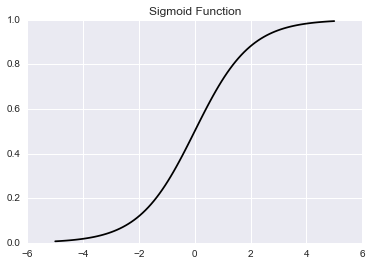

In [79]:
a = np.linspace(-5, 5, 100)
b = 1.0 / (1.0 + np.exp(-a))
sns.set_style('darkgrid')
plt.title("Sigmoid Function")
plt.plot(a, b, color="black")
plt.show()

We can compute this function elementwise on a matrix of doubles by defining a matrix variable and a variable holding a symbolic function of this matrix.  Because all the components of this function (addition, division, exponentiation) are elementwise operations, the overall function is elementwise

In [81]:
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = function([x], s)

In [82]:
logistic([[1, -2],[3, 10]])

array([[ 0.73105858,  0.11920292],
       [ 0.95257413,  0.9999546 ]])

<h3>Functions with multiple outputs</h3>
We can easily compute the squared and absolute elementwise difference between two matricies

In [84]:
a, b = T.dmatrices('a', 'b') # notation shorcut to define two variables at the same time
diff = a - b
abs_diff = abs(diff)
squared_diff = diff**2
f = function([a, b], [diff, abs_diff, squared_diff])

In [93]:
print f([[-1, 2],[9, 2]],[[4, 1],[2, 3]])[0]
print
print f([[-1, 2],[9, 2]],[[4, 1],[2, 3]])[1]
print
print f([[-1, 2],[9, 2]],[[4, 1],[2, 3]])[2]

[[-5.  1.]
 [ 7. -1.]]

[[ 5.  1.]
 [ 7.  1.]]

[[ 25.   1.]
 [ 49.   1.]]


<h3>Default arguments in Theano functions</h3>
suppose we have some function that adds two scalars, except that if you only provide one number - the other is assumed to be 1.  instead of providing the variable in the function, we provide theano.param() with the first argument as the variable and the second as a default value

In [94]:
x, y = T.dscalars('x', 'y')
z = x + y
f = function([x, theano.Param(y, default=1)], z)
f(2)

array(3.0)

<h3>Shared Variables</h3>
it is possible to have functions with an internal state, such as an accumulator function: adds some value every time it is called and stores this value.  We create a shared variable with theano.shared

In [97]:
state = theano.shared(0) # initialized at 0
inc = T.iscalar('inc')
accumulator = function([inc], state, updates=[(state, state + inc)])

Now we've also introduced the "updates" argument for functions.  With shared variables, we define a list of tuples which tells us what to do with each shared variable.

In [98]:
accumulator(1)
state.get_value()

array(1)

In [99]:
accumulator(300)
state.get_value()

array(301)

In [100]:
state.set_value(-1)
accumulator(1)
state.get_value()

array(0)

we can also define more than one function to use each shared variable.  Perhaps to want a decrementor function as well

In [101]:
dec = T.iscalar('dec')
decrementor = function([dec], state, updates=[(state, state - dec)])

In [102]:
state.set_value(0)
accumulator(22)
decrementor(10)
state.get_value()

array(12)

<h3>Using Random Variables</h3>

<h1>Logistic Regression</h1>

A logistic regression can be thought of as an artificial neural network with a single layer.  Given some data X and target classes y, a logistic regression is parameterized by a single weight matrix W and bias vector b.
​
​
The model gives the probability that some data x belongs to class i,
​
$$P(Y = i| x, W, b) = softmax_i(Wx + b)$$
​
Where the softmax function normalizes a series of responses to $[0, 1]$,
​
$$softmax_i = \frac{e^{W_ix + b_i}}{\sum_j e^{W_jx + b_j}} $$
​
And the predicted class is simply
$$y_{pred} = argmax_i P(Y = i |x, W, b) $$

Here we'll stick with a one-class logistic regresion, then expand it to multiclass

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
attributes = data['data']
labels = data['target']

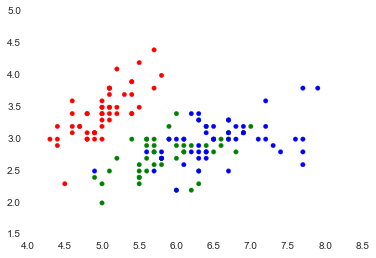

In [4]:
colors=["red","green","blue"]
plt.scatter(attributes[:, 0], attributes[:, 1], color=map(lambda x: colors[x], labels))
plt.show()

In [5]:
labels = map(lambda x: int(x == 0), labels)

First, lets declare the symbolic variables we'll need to use for our theano functions.

In [6]:
attributes.shape

(150, 4)

In [17]:
# size and dimension of data
N = 150
D = 4
x = T.dmatrix('x')  # holds our datapoints
y = T.dvector('y')  # holds the class labels

w = theano.shared(np.array([1., 1., 1., 1.]), name="w")  # shared variable holds the weights for the model
b = theano.shared(0., name="b")              # shared variable holds the bias (intercept)

In [18]:
print w.get_value()

[ 1.  1.  1.  1.]


In [19]:
print b.get_value()

0.0


In [22]:
# construct theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))
prediction = p_1 > 0.5

# define our loss function - cross entropy and cost to minimize
x_ent = -y * T.log(p_1) - (1 - y) * T.log(1 - p_1)
cost = x_ent.mean() + 0.01 * (w**2).sum()

# partial derivatives for gradient minimization
gw, gb = T.grad(cost, [w, b])

In [24]:
# Compile the code into a single function

train = theano.function(
          inputs=[x,y],    # inputs our data
          outputs=[prediction, x_ent], # computes our estimated probability and loss function
          updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))  # updates shared variables based on gradient
predict = theano.function(inputs=[x], outputs=prediction)  # compute predicted classes

In [28]:
for i in range(100):
    pred, err = train(attributes, labels)

print "Final model:"
print w.get_value(), b.get_value()

Final model:
[ 0.18242256  1.28009698 -1.72821145 -0.44310237] 0.1079929868


In [29]:
labels == predict(attributes)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Since we know the above problem is linearly separable, we should expect to get completely correct classification!